In [17]:
import pickle
import plotly.graph_objects as go
import os
import numpy as np

# List of pickle files to compare
pickle_files = [
    '../../models/rewards/training_rewards_feature_attention.pickle',
    '../../models/rewards/training_rewards_cnn.pickle',
    '../../models/rewards/training_rewards_mlp_32_16.pickle',
    '../../models/rewards/training_rewards_pca.pickle'
]

# First pass: Load all data and find maximum length
all_rewards = []
labels = []
for file_path in pickle_files:
    with open(file_path, 'rb') as f:
        rewards = pickle.load(f)
    all_rewards.append(rewards)
    labels.append(os.path.splitext(os.path.basename(file_path))[0])

max_length = max(len(r) for r in all_rewards)

# Create figure
fig = go.Figure()

# Second pass: Interpolate and plot
for rewards, label in zip(all_rewards, labels):
    # Create normalized x-axis (0-1 range)
    x_original = np.linspace(0, 1, len(rewards))
    x_target = np.linspace(0, 1, max_length)
    
    # Linear interpolation
    y_interpolated = np.interp(x_target, x_original, rewards)
    
    fig.add_trace(go.Scatter(
        x=x_target,
        y=y_interpolated,
        mode='lines',
        name=label,
        hovertemplate='Progress: %{x:.2f}<br>Reward: %{y:.2f}<extra></extra>'
    ))

# Customize plot layout
fig.update_layout(
    title='Normalized Training Rewards Comparison',
    xaxis_title='Normalized Training Progress (0 = start, 1 = end)',
    yaxis_title='Reward',
    legend_title='Agent Versions',
    hovermode='x unified'
)

# Show plot
fig.show()

(1003, 4)


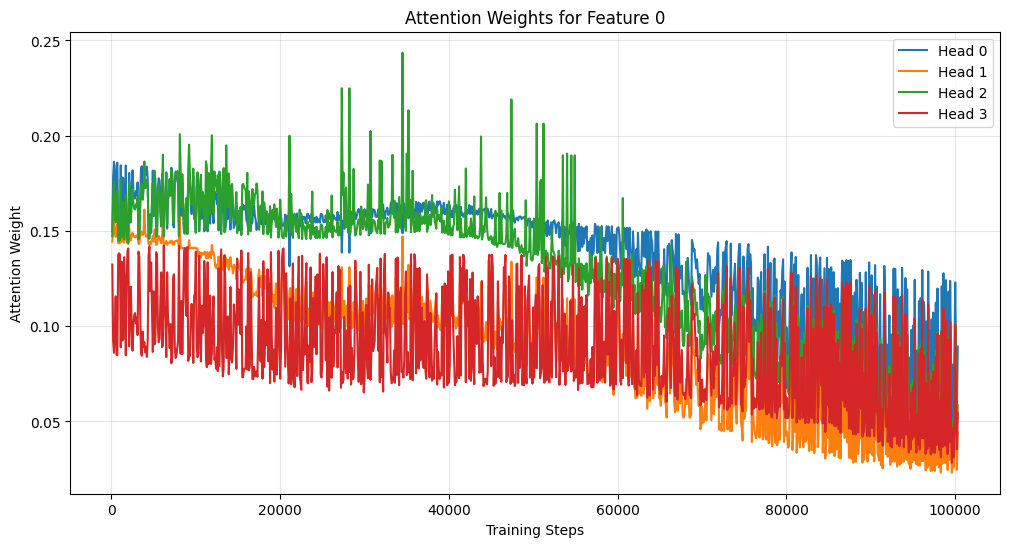

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load saved attention weights
history = np.load("../../models/attention_weights_history.npy", allow_pickle=True)

# Example: Plot weights for Feature 0 across all heads
feature_idx = 0  # Change this to visualize other features
steps = [entry["step"] for entry in history]
weights = [entry["weights"][:, feature_idx] for entry in history]  # Shape: (num_heads,)

# Convert to NumPy array for easier slicing
weights = np.array(weights)
print(weights.shape)
plt.figure(figsize=(12, 6))
for head_idx in range(weights.shape[1]):
    plt.plot(steps, weights[:, head_idx], label=f"Head {head_idx}")

plt.xlabel("Training Steps")
plt.ylabel("Attention Weight")
plt.title(f"Attention Weights for Feature {feature_idx}")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

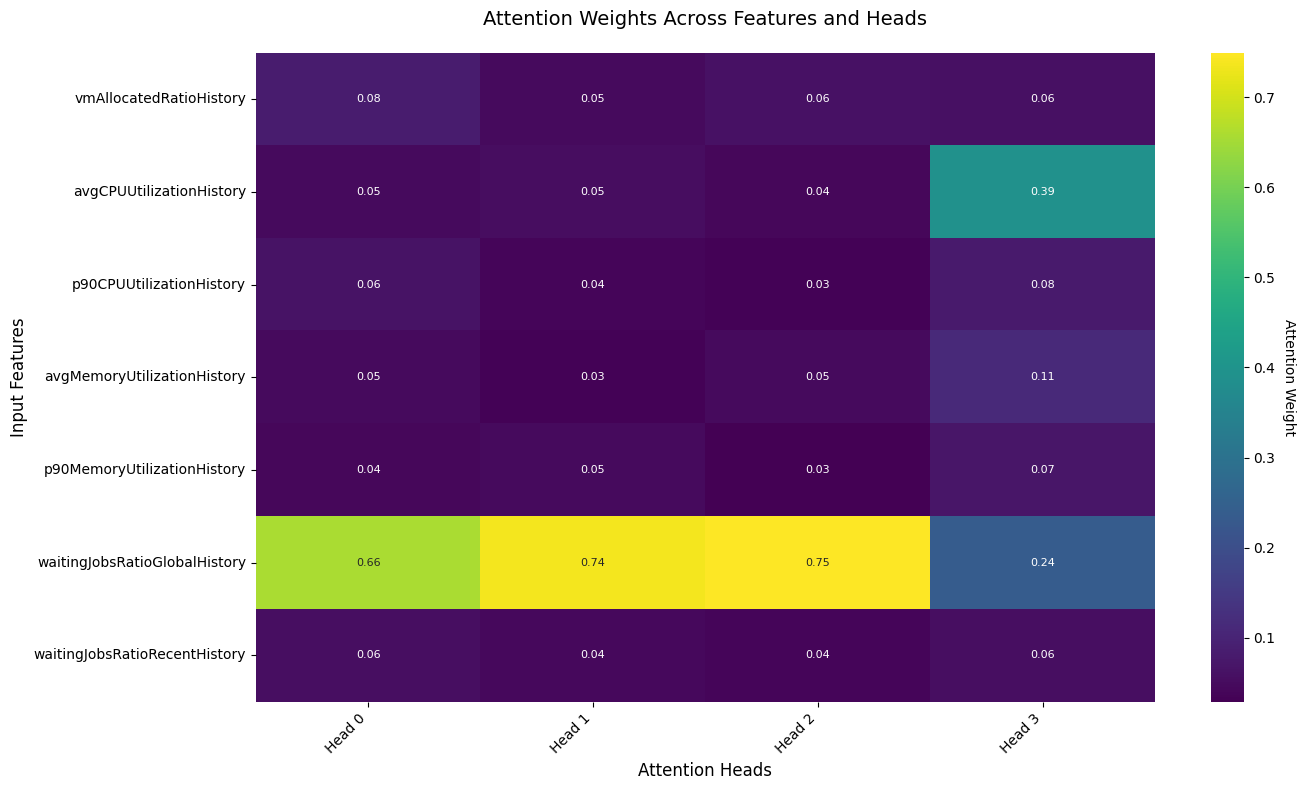

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load saved attention weights
history = np.load("../../models/attention_weights_history.npy", allow_pickle=True)

# Get final attention weights (average over last N steps)
last_weights = np.mean([entry["weights"] for entry in history[-50:]], axis=0)  # Shape: (num_heads, num_features)

# Create feature name mapping
feature_names = {
    0: "vmAllocatedRatioHistory",
    1: "avgCPUUtilizationHistory",
    2: "p90CPUUtilizationHistory",
    3: "avgMemoryUtilizationHistory",
    4: "p90MemoryUtilizationHistory",
    5: "waitingJobsRatioGlobalHistory",
    6: "waitingJobsRatioRecentHistory"
}

# Convert to ordered list of labels
feature_labels = [feature_names[i] for i in range(last_weights.shape[1])]

plt.figure(figsize=(14, 8))
ax = sns.heatmap(
    last_weights.T,  # Transpose to show features as rows
    cmap="viridis",
    annot=True,
    fmt=".2f",
    yticklabels=feature_labels,
    xticklabels=[f"Head {i}" for i in range(last_weights.shape[0])],
    annot_kws={"fontsize": 8}
)

# Improve label readability
plt.xlabel("Attention Heads", fontsize=12)
plt.ylabel("Input Features", fontsize=12)
plt.title("Attention Weights Across Features and Heads", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add colorbar with label
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Attention Weight', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

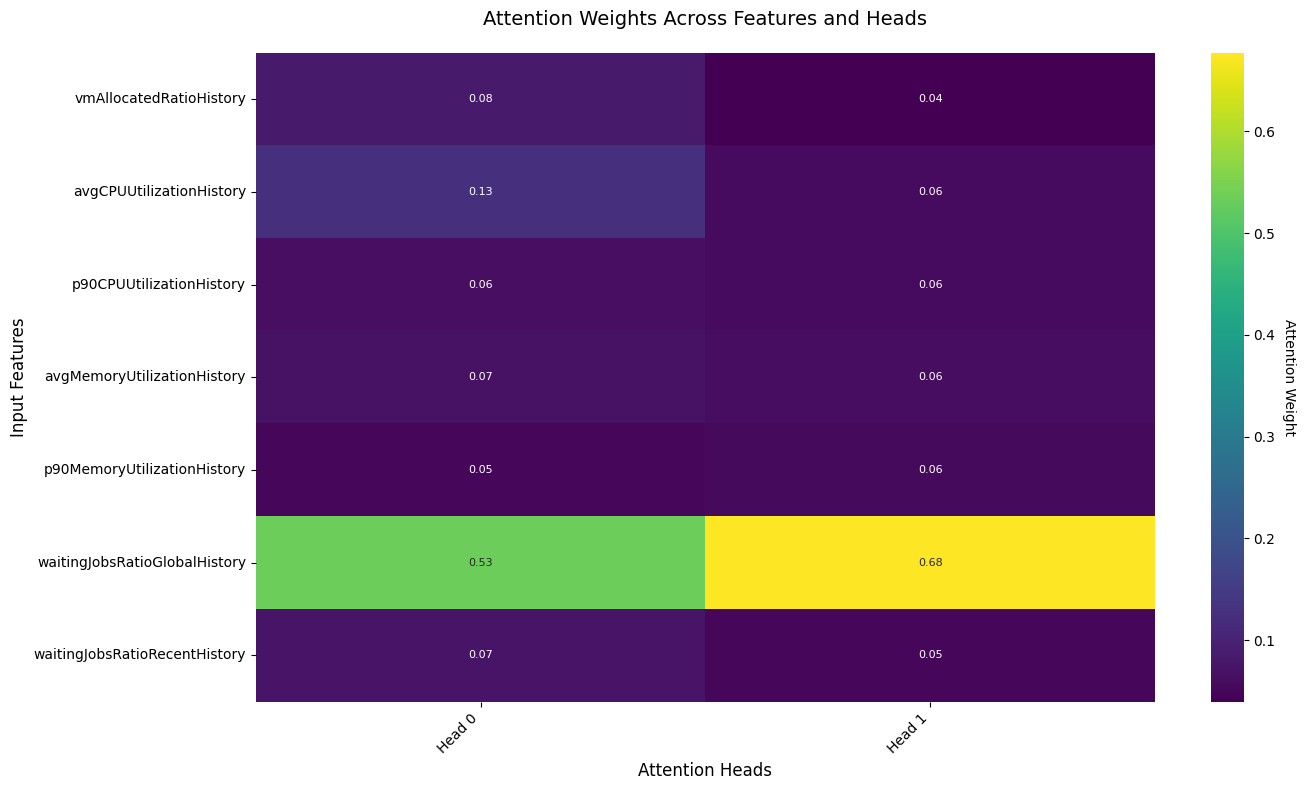

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load saved attention weights
history = np.load("attention_weights_history.npy", allow_pickle=True)

# Get final attention weights (average over last N steps)
last_weights = np.mean([entry["weights"] for entry in history[-50:]], axis=0)  # Shape: (num_heads, num_features)

# Create feature name mapping
feature_names = {
    0: "vmAllocatedRatioHistory",
    1: "avgCPUUtilizationHistory",
    2: "p90CPUUtilizationHistory",
    3: "avgMemoryUtilizationHistory",
    4: "p90MemoryUtilizationHistory",
    5: "waitingJobsRatioGlobalHistory",
    6: "waitingJobsRatioRecentHistory"
}

# Convert to ordered list of labels
feature_labels = [feature_names[i] for i in range(last_weights.shape[1])]

plt.figure(figsize=(14, 8))
ax = sns.heatmap(
    last_weights.T,  # Transpose to show features as rows
    cmap="viridis",
    annot=True,
    fmt=".2f",
    yticklabels=feature_labels,
    xticklabels=[f"Head {i}" for i in range(last_weights.shape[0])],
    annot_kws={"fontsize": 8}
)

# Improve label readability
plt.xlabel("Attention Heads", fontsize=12)
plt.ylabel("Input Features", fontsize=12)
plt.title("Attention Weights Across Features and Heads", fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Add colorbar with label
cbar = ax.collections[0].colorbar
cbar.ax.set_ylabel('Attention Weight', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

In [8]:
import numpy as np
import plotly.graph_objects as go

# Load saved attention weights
history = np.load("../../models/attention_weights_history.npy", allow_pickle=True)

# Create feature name mapping
feature_names = {
    0: "vmAllocatedRatioHistory",
    1: "avgCPUUtilizationHistory",
    2: "p90CPUUtilizationHistory",
    3: "avgMemoryUtilizationHistory",
    4: "p90MemoryUtilizationHistory",
    5: "waitingJobsRatioGlobalHistory",
    6: "waitingJobsRatioRecentHistory"
}

# Convert history to list of dictionaries
history = history.tolist()
steps = [entry['step'] for entry in history]
max_step = max(steps)
feature_labels = [feature_names[i] for i in range(len(feature_names))]

# Create slider steps every 1000 steps
slider_steps = list(range(0, max_step + 1, 1000))
heatmap_data = []

# Pre-calculate averages for each time window
for step in slider_steps:
    # Get all entries up to current step
    relevant_entries = [entry for entry in history if entry['step'] <= step]
    
    if len(relevant_entries) > 0:
        # Use last 50 entries or all available if less than 50
        window = relevant_entries[-50:]
        avg_weights = np.mean([entry['weights'] for entry in window], axis=0)
    else:
        avg_weights = np.zeros((len(feature_names), len(feature_names)))  # Empty matrix
    
    heatmap_data.append(avg_weights.T)  # Transpose for correct orientation

# Create initial figure
fig = go.Figure()

# Add initial trace
fig.add_trace(
    go.Heatmap(
        z=heatmap_data[0],
        x=[f"Head {i}" for i in range(heatmap_data[0].shape[1])],
        y=feature_labels,
        colorscale='Viridis',
        colorbar=dict(title='Attention Weight')
))

# Create frames for animation
frames = []
for i, (step, data) in enumerate(zip(slider_steps, heatmap_data)):
    frames.append(go.Frame(
        data=[go.Heatmap(
            z=data,
            x=[f"Head {i}" for i in range(data.shape[1])],
            y=feature_labels
        )],
        name=str(step),
        traces=[0]
    ))

# Create slider
slider_ui = [{
    'steps': [
        {
            'args': [
                [frame.name],
                {'frame': {'duration': 300, 'redraw': True},
                 'mode': 'immediate',
                 'transition': {'duration': 300}}
            ],
            'label': str(step),
            'method': 'animate'
        } for step, frame in zip(slider_steps, frames)
    ],
    'active': 0,
    'currentvalue': {'prefix': 'Training Step: '},
    'pad': {'t': 50}
}]

# Add play button and style layout
fig.update_layout(
    title='Attention Weights Evolution During Training',
    xaxis_title='Attention Heads',
    yaxis_title='Input Features',
    updatemenus=[{
        'type': 'buttons',
        'showactive': False,
        'buttons': [{
            'label': '▶ Play',
            'method': 'animate',
            'args': [
                None, 
                {
                    'frame': {'duration': 500, 'redraw': True},
                    'fromcurrent': True, 
                    'transition': {'duration': 300}
                }
            ]
        }]
    }],
    sliders=slider_ui
)

# Set consistent color scale across all frames
max_weight = 1.0
fig.update_layout(coloraxis=dict(cmin=0, cmax=max_weight))

# Add frame data
fig.frames = frames

fig.show()

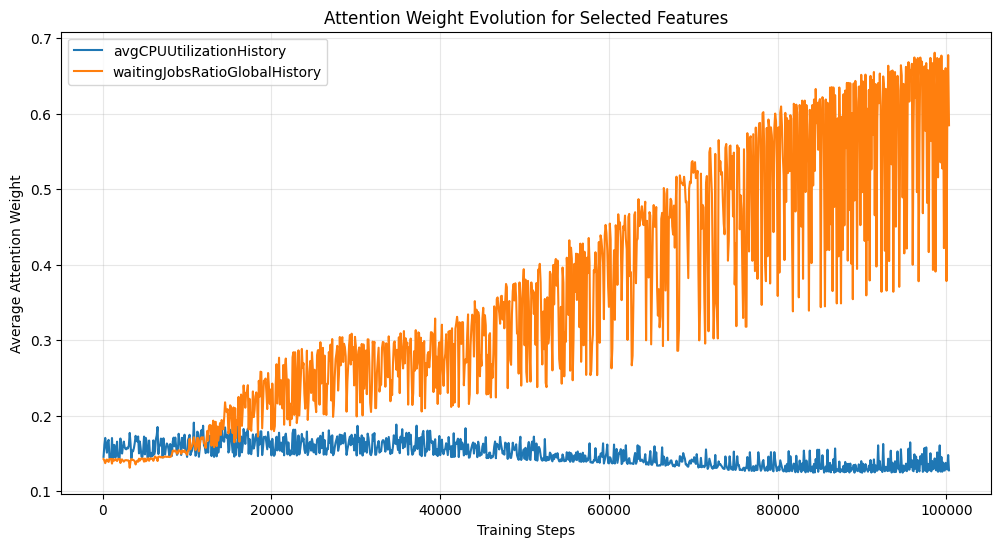

In [12]:
# For temporal evolution of specific features
selected_features = ["avgCPUUtilizationHistory", "waitingJobsRatioGlobalHistory"]
feature_indices = [k for k, v in feature_names.items() if v in selected_features]

plt.figure(figsize=(12, 6))
for idx in feature_indices:
    weights_over_time = [entry["weights"][:, idx] for entry in history]
    plt.plot(
        [entry["step"] for entry in history],
        np.mean(weights_over_time, axis=1),  # Average across heads
        label=feature_names[idx]
    )

plt.xlabel("Training Steps")
plt.ylabel("Average Attention Weight")
plt.title("Attention Weight Evolution for Selected Features")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [1]:
import os
import numpy as np
import plotly.graph_objects as go
from natsort import natsorted

def visualize_cnn_weights_evolution(weights_dir):
    # Load all weight files
    weight_files = natsorted([f for f in os.listdir(weights_dir) if f.startswith('conv_weights_step_')])
    
    # Create data structure for visualization
    steps = []
    weight_data = []
    
    print(f"Found {len(weight_files)} weight files")
    
    # Load and process weights
    for weight_file in weight_files:
        # Extract step number
        step = int(weight_file.split('_')[3].split('.')[0])
        steps.append(step)
        
        # Load weights
        weights = np.load(os.path.join(weights_dir, weight_file))
        
        # Process weights for visualization:
        # Average across input channels and kernel dimensions
        # (out_channels, in_channels, kernel_h, kernel_w) -> (out_channels,)
        processed_weights = np.mean(weights, axis=(1, 2, 3))
        
        weight_data.append(processed_weights)
    
    # Convert to numpy array
    weight_matrix = np.array(weight_data).T  # Transpose for (filters, steps)
    
    # Create figure
    fig = go.Figure()
    
    # Add initial trace
    fig.add_trace(
        go.Heatmap(
            z=weight_matrix,
            x=steps,
            y=[f"Filter {i}" for i in range(weight_matrix.shape[0])],
            colorscale='Viridis'
        )
    )
    
    # Create slider
    steps_slider = []
    for i, step in enumerate(steps):
        steps_slider.append(
            dict(
                method='update',
                args=[{'visible': [False] * len(steps)},
                      {'title': f'CNN Weights at Step: {step}'}],
                label=str(step)
            )
        )
        steps_slider[-1]['args'][0]['visible'][i] = True
    
    # Update layout with slider
    fig.update_layout(
        title='CNN Filter Weights Evolution During Training',
        xaxis_title='Training Step',
        yaxis_title='CNN Filters',
        sliders=[dict(
            active=0,
            currentvalue={"prefix": "Training Step: "},
            pad={"t": 50},
            steps=steps_slider
        )],
        width=1200,
        height=800
    )
    
    # Add play button
    fig.update_layout(
        updatemenus=[{
            "type": "buttons",
            "showactive": False,
            "buttons": [{
                "label": "▶ Play",
                "method": "animate",
                "args": [None, {
                    "frame": {"duration": 100, "redraw": True},
                    "fromcurrent": True,
                    "transition": {"duration": 50}
                }]
            }]
        }]
    )
    
    # Create frames for animation
    frames = []
    for i, step in enumerate(steps):
        frames.append(
            go.Frame(
                data=[go.Heatmap(
                    z=weight_matrix[:, i:i+1],
                    x=[step],
                    y=[f"Filter {i}" for i in range(weight_matrix.shape[0])]
                )],
                name=str(step)
            )
        )
    
    fig.frames = frames
    
    fig.show()

# Usage
visualize_cnn_weights_evolution("./")

Found 12 weight files


In [24]:
import os
import pickle
path = r'C:\Users\ultramarine\Desktop\ppo_magisterka\trainloop_driver_official\trainloop-driver\models\18_06\attention_automatic'
t_file = os.path.join(path, 'training_timesteps_10_000.pickle')
r_file = os.path.join(path, 'training_rewards_10_000.pickle')
t_file_ = os.path.join(path, 'training_timesteps.pickle')
r_file_ = os.path.join(path, 'training_rewards.pickle')
with open(r_file, 'rb') as f:
        rewards = pickle.load(f)
with open(t_file, 'rb') as f:
        timesteps = pickle.load(f)
with open(r_file_, 'rb') as f:
        rewards_ = pickle.load(f)
with open(t_file_, 'rb') as f:
        timesteps_ = pickle.load(f)



In [15]:
import os
import pickle
path = r'C:\Users\ultramarine\Desktop\ppo_magisterka\trainloop_driver_official\trainloop-driver\models\rewards'
t_file = os.path.join(path, 'training_timesteps_sparse_autoencoder.pickle')
r_file = os.path.join(path, 'training_rewards_sparse_autoencoder.pickle')
with open(r_file, 'rb') as f:
        rewards = pickle.load(f)
with open(t_file, 'rb') as f:
        timesteps = pickle.load(f)

In [13]:
timesteps = [t-10000 for t in timesteps]  # Adjusting timesteps to start from 10000

In [25]:
rewards = rewards + rewards_
timesteps = timesteps + [t+10000 for t in timesteps_]

In [28]:
rewards[-1]

-1.919

In [27]:
len(timesteps)

54

In [29]:
timesteps = timesteps + [100000 + n*10000 for n in range(1, 11)]


In [30]:
timesteps[-1]

200000

In [31]:
rewards = rewards + [-1.919 for _ in range(1, 11)]

In [26]:
prev_t = 0
for t in timesteps:
    if prev_t>t:
        print(prev_t)
    prev_t=t

In [32]:
with open(os.path.join(path, 'training_rewards_attention_automatic.pickle'), "wb") as fb:
    pickle.dump(rewards, fb)
timesteps = timesteps[:]
with open(os.path.join(path, 'training_timesteps_attention_automatic.pickle'), "wb") as fb:
    pickle.dump(timesteps, fb)


In [34]:
import plotly.graph_objects as go
import pickle
import numpy as np

algos = ['mlp', 'sparse_autoencoder', 'pca', 'sparse_ae_temporal_spatial', 'attention_automatic']
         #'cnn_detached', 'cnn']
#['afs_mlppolicy', 'pca_feature_selection', 'mlp', 'cnn']
#['afs', 'attention', 'autoencoder', 'pca', 'cnn', 'mlp', 'sparse_autoencoder', 'afs_mlppolicy', 'afs_recurrent_ppo', 'pca_feature_selection', 'pca_feature_selection_recurrent', 'recurrent_ppo']
#'sparse_autoencoder', 'afs_recurrent_ppo', 'pca_feature_selection_recurrent'] 'cnn, 'mlp, 'attention', 'autencoder', 'pca', 'afs', 'sparse_autoencoder', 'afs_mlppolicy', 'afs_recurrent_ppo', 'pca_feature_selection_recurrent']
rewards_files = [f'../../models/rewards/training_rewards_{i}.pickle' for i in algos] 
timesteps_files = [f'../../models/rewards/training_timesteps_{i}.pickle' for i in algos]

# Create a figure
fig = go.Figure()

# Load data and create traces for each algorithm
for algo, r_file, t_file in zip(algos, rewards_files, timesteps_files):
    # Load rewards data
    with open(r_file, 'rb') as f:
        rewards = pickle.load(f)
    # Load timesteps data (per episode)
    with open(t_file, 'rb') as f:
        timesteps = pickle.load(f)
        print(f'Len of rewards: {len(timesteps)} for {algo}')
        print(timesteps)
    # Calculate cumulative timesteps
    #cumulative_timesteps = np.cumsum(timesteps)
    
    # Add trace for current algorithm
    fig.add_trace(go.Scatter(
        x=timesteps,
        y=rewards,
        mode='lines',
        name=algo,
        showlegend=True
    ))

# Customize the layout
fig.update_layout(
    title='Nagrody vs kroki czasowe',
    xaxis_title='Krok czasowy',
    yaxis_title='Nagroda za epizod',
    legend_title='Algorytm',
    template='plotly_white',
    width=1000,
    height=600,
    margin=dict(l=50, r=50, b=50, t=50)
)

# Show the plot
fig.show()

Len of rewards: 4000 for mlp
[50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000, 6050, 6100, 6150, 6200, 6250, 6300, 6350, 6400, 6450, 6500, 6550, 6600, 6650, 6700, 6750, 6800, 6850, 6900, 6950, 7000, 7050, 7100, 7150, 7200, 7250, 7300, 7350, 7400, 7450, 7500, 7550, 7600, 7650, 7700, 7750, 7800, 7850, 7900, 7950, 8000, 8050, 8100, 8150, 8200, 8250, 